In [1]:
import numpy as np  
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, rand_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [2]:
''' reading data '''
df = pd.read_csv('C:/Users/Mohan/Documents/Machine Learning R_27.07.21\Machine Learning Projects 80 - Mall Customer Segmentation Data/Mall_Customers.csv')

In [3]:
''' displaying first 5 rows '''
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
''' shape of data '''
df.shape

(200, 5)

In [5]:
''' checking null values '''
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
''' checking info of data '''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


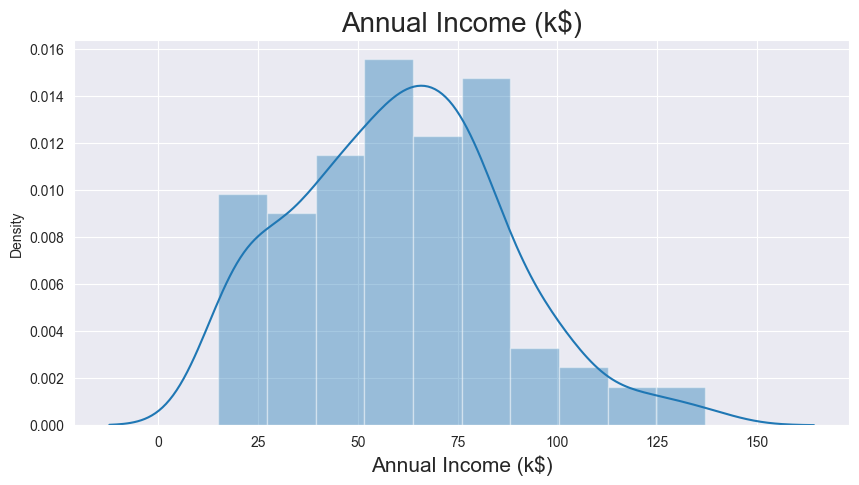

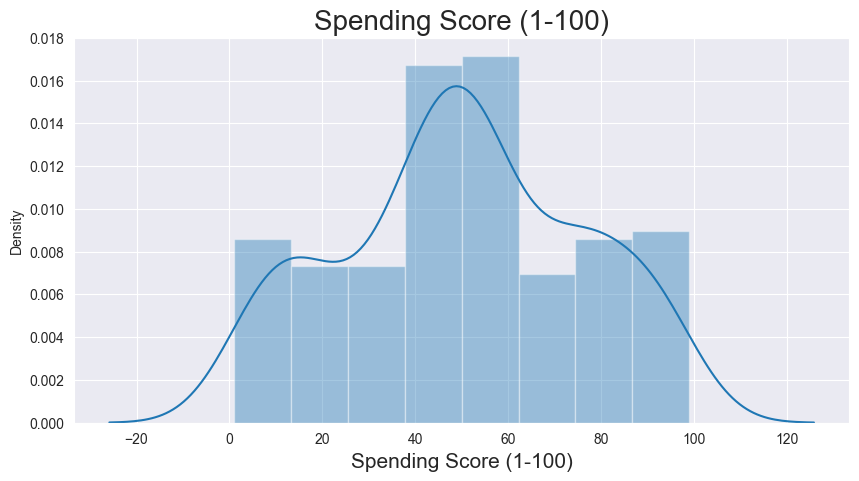

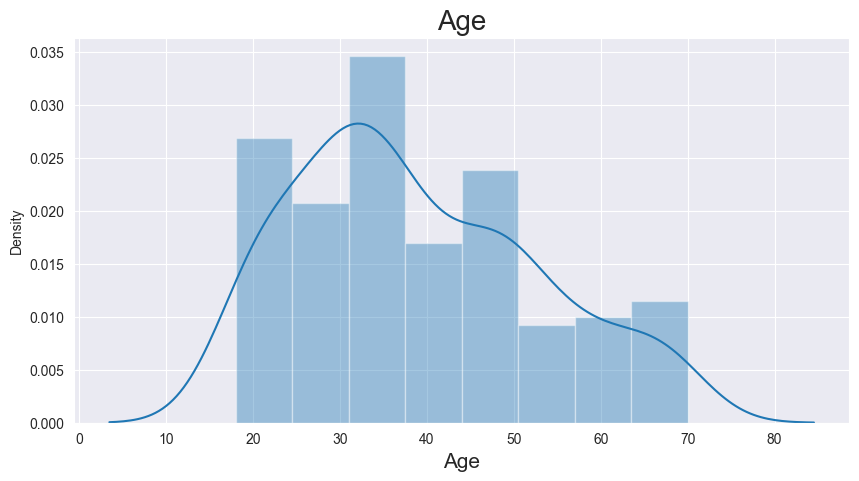

In [7]:
''' distribution plot '''
for column in ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']:
    plt.figure(figsize=(10, 5))
    sns.distplot(df[column]);
    plt.xlabel(column, fontsize=15)
    plt.ylabel('Density')
    plt.title(column, fontsize=20);

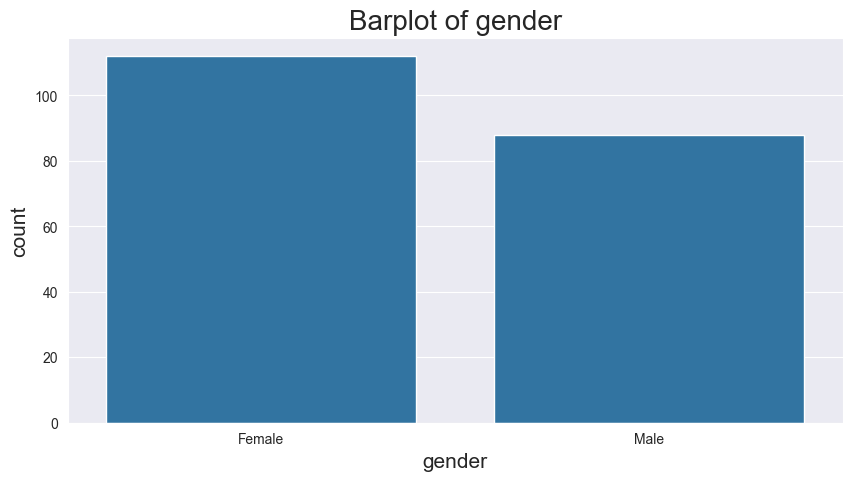

In [9]:
''' barplot of gender'''
gender = df.Gender.value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(gender)
plt.title('Barplot of gender', fontsize=20)
plt.xlabel('gender', fontsize=15)
plt.ylabel('count', fontsize=15);

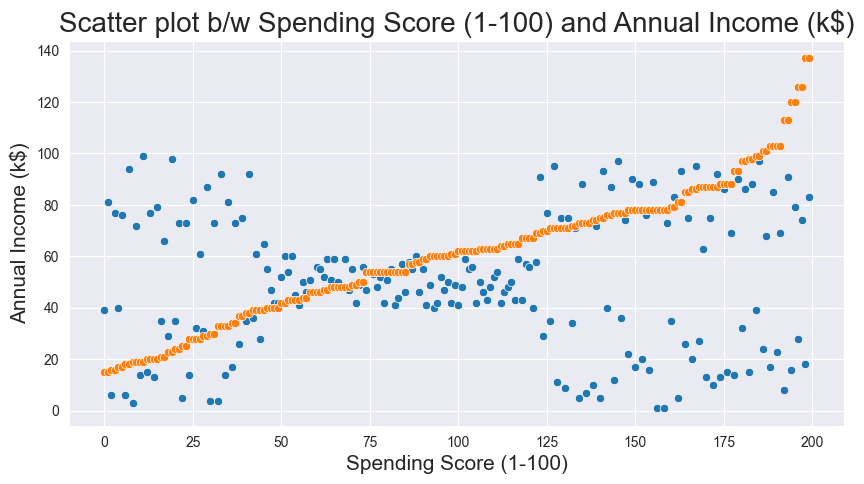

In [11]:
''' scatter plot b/w Spending Score (1-100) and Annual Income (k$) '''
plt.figure(figsize=(10, 5))
sns.scatterplot(df['Spending Score (1-100)']), sns.scatterplot(df['Annual Income (k$)'])
plt.xlabel('Spending Score (1-100)', fontsize=15)
plt.ylabel('Annual Income (k$)', fontsize=15)
plt.title('Scatter plot b/w Spending Score (1-100) and Annual Income (k$)', fontsize=20);

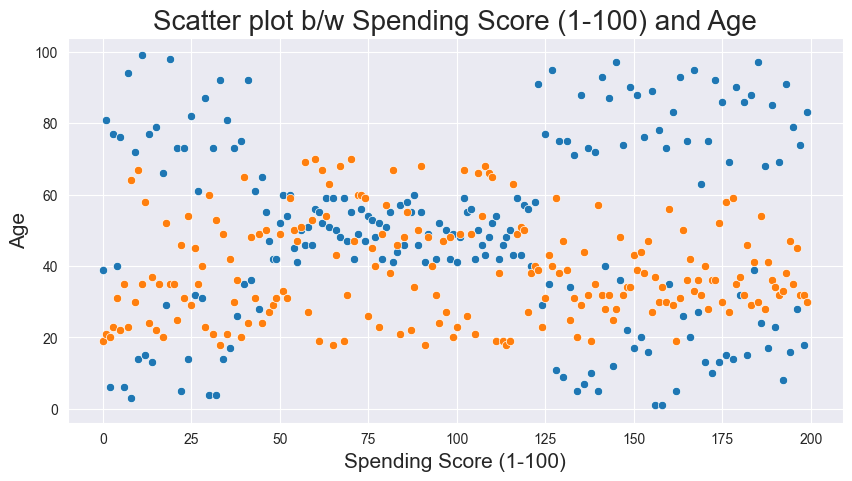

In [13]:
''' scatter plot b/w Age and Spending Score (1-100) '''
plt.figure(figsize=(10, 5))
sns.scatterplot(df['Spending Score (1-100)']),sns.scatterplot(df['Age'])
plt.xlabel('Spending Score (1-100)', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.title('Scatter plot b/w Spending Score (1-100) and Age', fontsize=20);

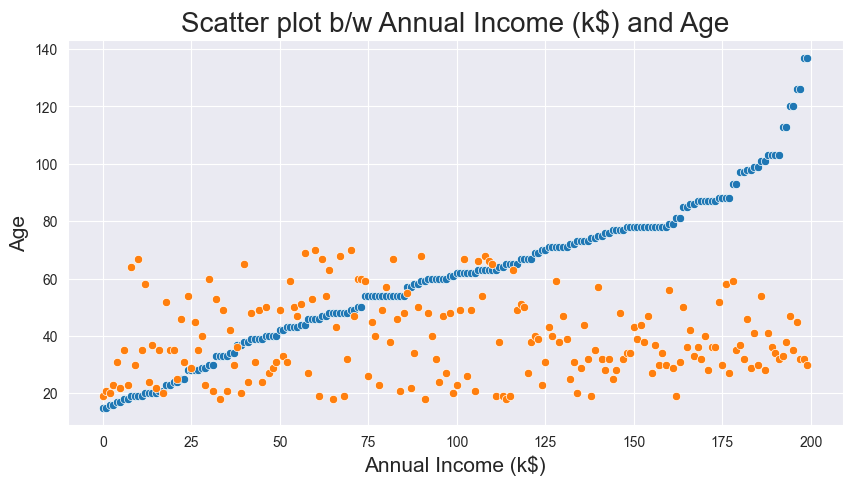

In [15]:
''' scatter plot b/w Age and Annual Income (k$) '''
plt.figure(figsize=(10, 5))
sns.scatterplot(df['Annual Income (k$)']), sns.scatterplot(df['Age'])
plt.xlabel('Annual Income (k$)', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.title('Scatter plot b/w Annual Income (k$) and Age', fontsize=20);

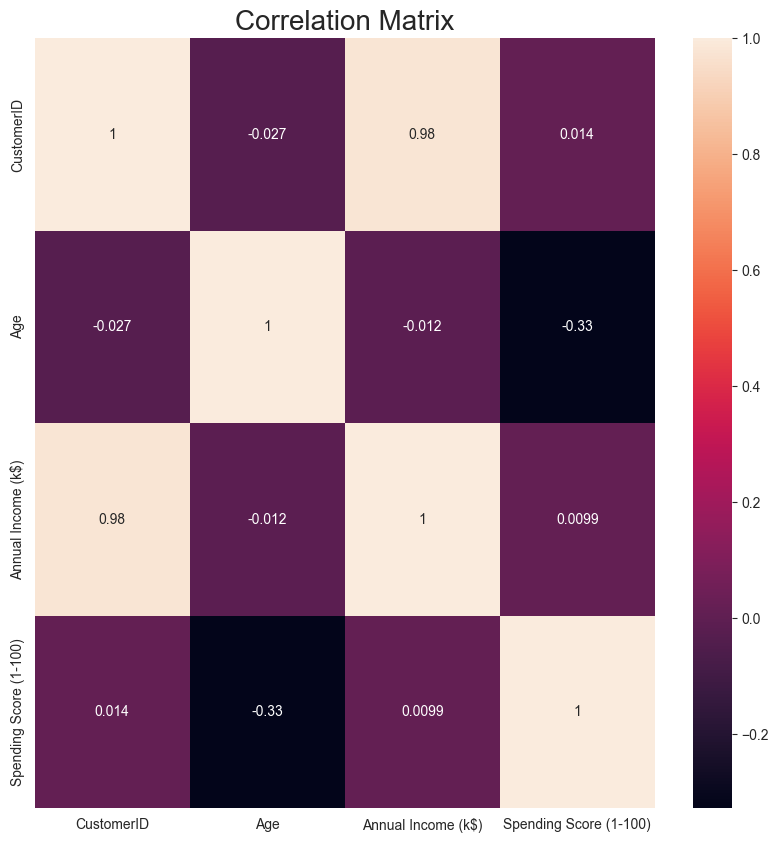

In [16]:
''' correlation matrix '''
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=20);

In [17]:
''' converting gender column into one-hot encoding '''
df['Gender'] = np.where(df.Gender == "Male", 1, 0)

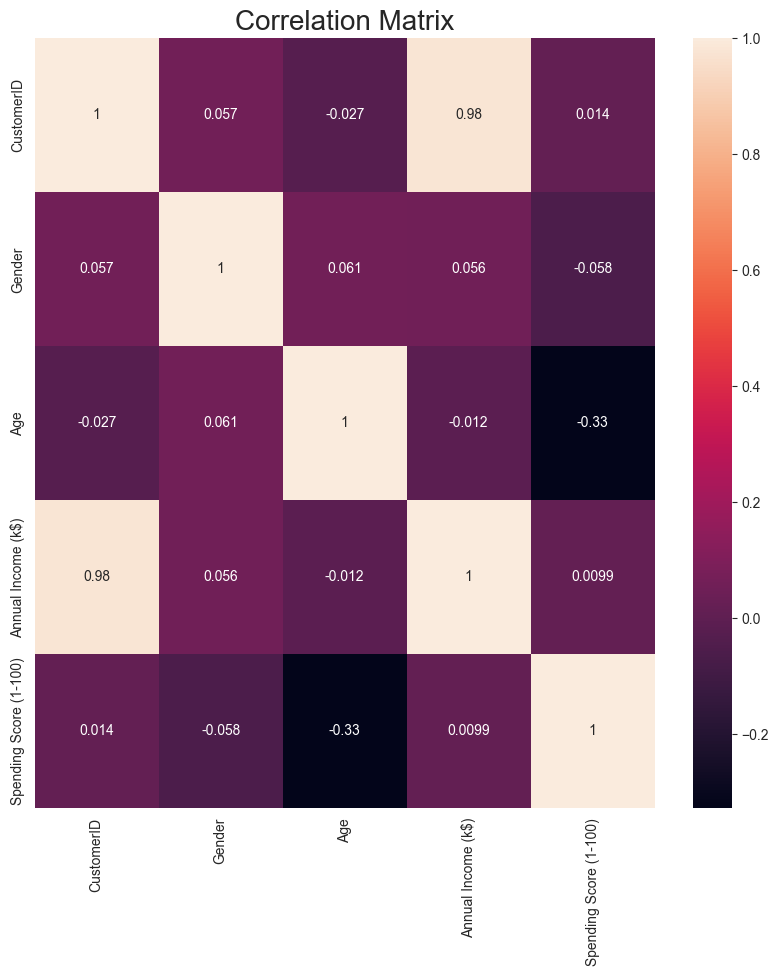

In [18]:
''' correlation matrix '''
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=20);

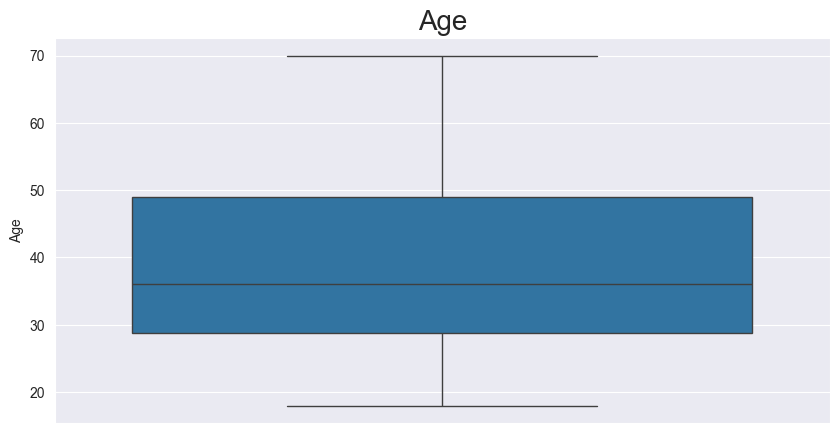

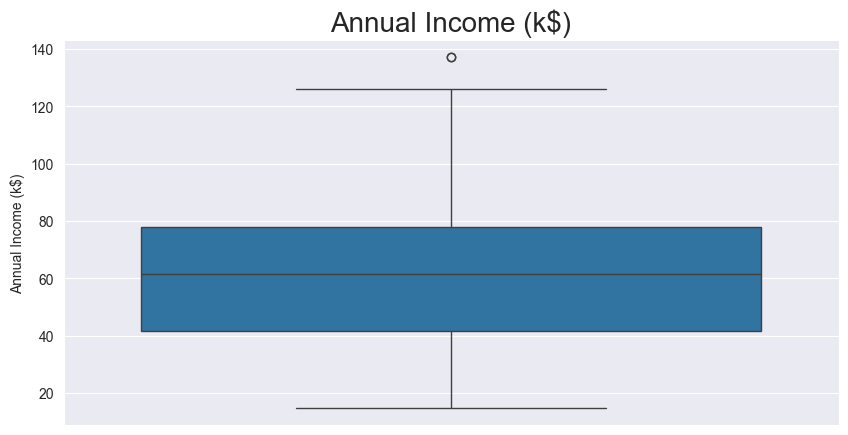

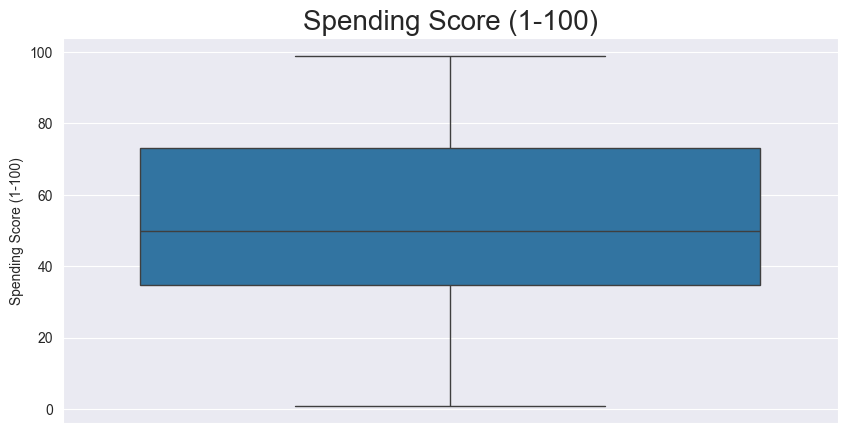

In [19]:
''' Boxplot '''
for column in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[column])
    plt.title(column, fontsize=20);

In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [21]:
''' using only two columns '''
df_new = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [22]:
df_new.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [23]:
''' train test split '''
X_train, X_test = train_test_split(df_new, random_state=0, test_size=0.2)

In [24]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (160, 2)
X_test shape:  (40, 2)


In [25]:
''' Min Max Scaler '''
min_max_sc = MinMaxScaler()

X_train = pd.DataFrame(min_max_sc.fit_transform(X_train), columns=df_new.columns)
X_test = pd.DataFrame(min_max_sc.transform(X_test), columns=df_new.columns)

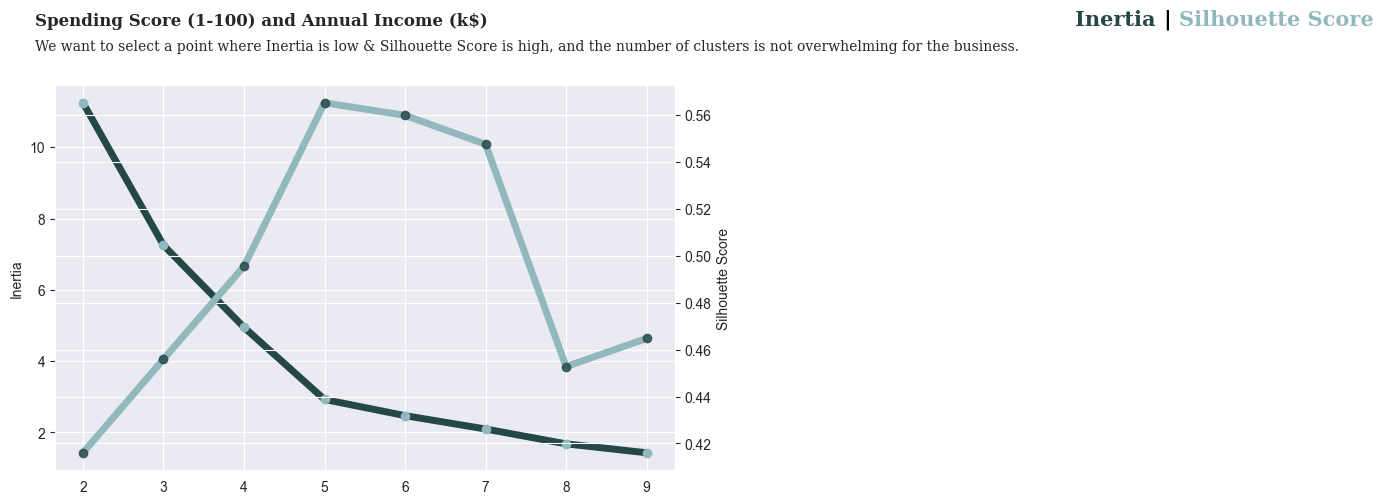

In [26]:
''' K-Means Clustering '''
inertia = []
silh_sc = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    ''' fit on data '''
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)
    
    ''' silhoutte score'''
    silh_sc.append(silhouette_score(X_train, kmeans.predict(X_train)))

fig, ax1 = plt.subplots(figsize=(8, 5))
fig.text(0.1, 1, 'Spending Score (1-100) and Annual Income (k$)', fontfamily='serif', fontsize=12, fontweight='bold')
fig.text(0.1, 0.95, 'We want to select a point where Inertia is low & Silhouette Score is high, and the number of clusters is not overwhelming for the business.',
         fontfamily='serif',fontsize=10)
fig.text(1.4, 1, 'Inertia', fontweight="bold", fontfamily='serif', fontsize=15, color='#244747')
fig.text(1.51, 1, "|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(1.53, 1, 'Silhouette Score', fontweight="bold", fontfamily='serif', fontsize=15, color='#91b8bd')

ax1.plot(range(2,10), inertia, '-', color='#244747', linewidth=5)
ax1.plot(range(2,10), inertia, 'o', color='#91b8bd')
ax1.set_ylabel('Inertia')

ax2 = ax1.twinx()
ax2.plot(range(2,10), silh_sc, '-', color='#91b8bd', linewidth=5)
ax2.plot(range(2,10), silh_sc, 'o', color='#244747', alpha=0.8)
ax2.set_ylabel('Silhouette Score')

plt.xlabel('Number of clusters')
plt.show()

In [27]:
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=111, algorithm='elkan')
pred = kmeans_model.fit_predict(X_test)

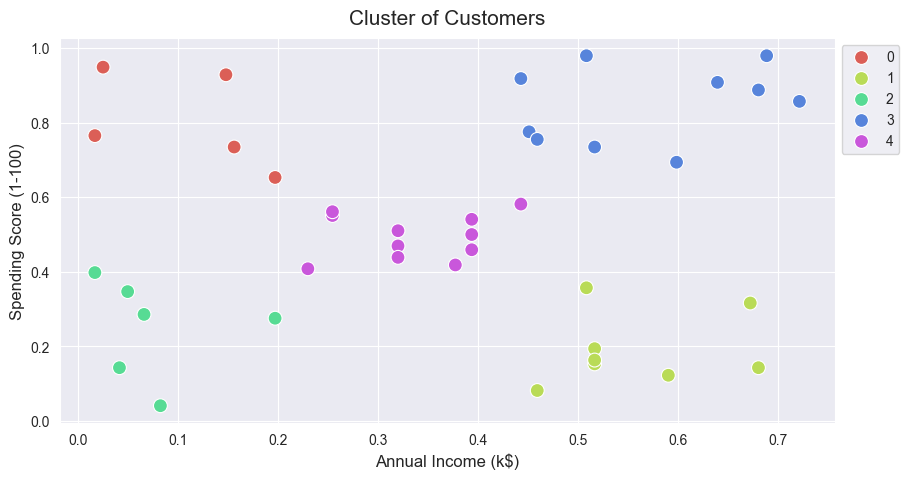

In [28]:
''' plotting the cluster '''
plt.figure(figsize=(10,5))
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=pred, palette=sns.color_palette('hls', 
                                                                                              len(np.unique(pred))), s=100)

plt.title('Cluster of Customers'.format(X_test.columns[0], X_test.columns[1]), size=15, pad=10)
plt.xlabel(X_test.columns[0], size=12)
plt.ylabel(X_test.columns[1], size=12)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

In [29]:
''' using 3 columns '''
df_new.columns
df_new = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]

df_new.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [30]:
''' train test split '''
X_train, X_test = train_test_split(df_new, random_state=0, test_size=0.2)

In [31]:
''' Min Max Scaler '''
min_max_sc = MinMaxScaler()

X_train = pd.DataFrame(min_max_sc.fit_transform(X_train), columns=df_new.columns)
X_test = pd.DataFrame(min_max_sc.transform(X_test), columns=df_new.columns)

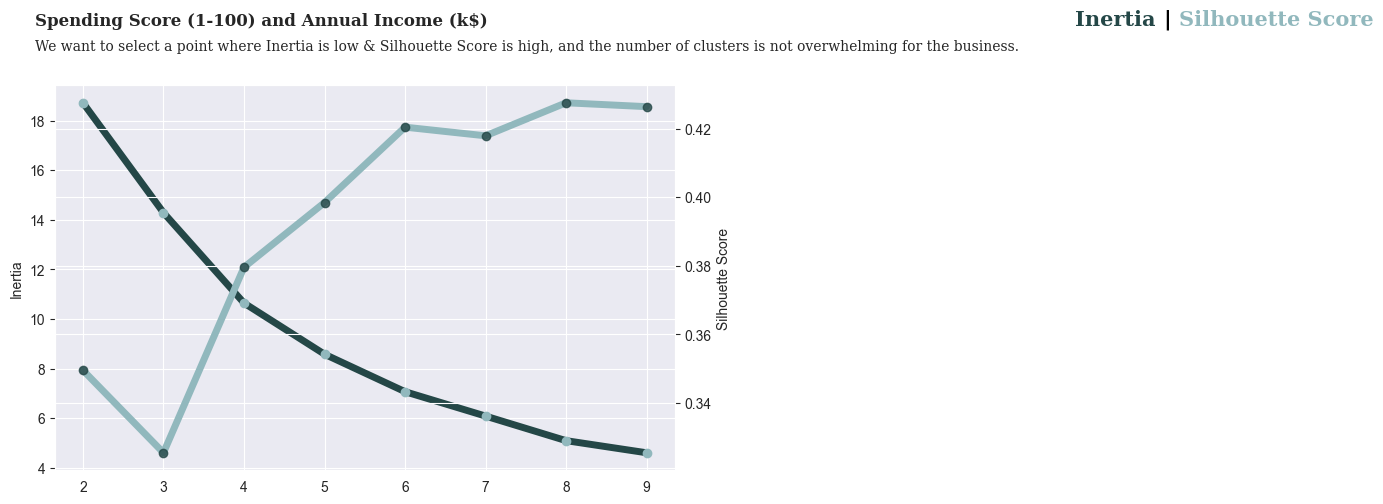

In [32]:
inertia = []
silh_sc = []
for i in range(2,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)
    silh_sc.append(silhouette_score(X_train, kmeans.predict(X_train)))

fig, ax1 = plt.subplots(figsize=(8, 5))
fig.text(0.1, 1, 'Spending Score (1-100) and Annual Income (k$)', fontfamily='serif', fontsize=12, fontweight='bold')
fig.text(0.1, 0.95, 'We want to select a point where Inertia is low & Silhouette Score is high, and the number of clusters is not overwhelming for the business.',
         fontfamily='serif',fontsize=10)
fig.text(1.4, 1, 'Inertia', fontweight="bold", fontfamily='serif', fontsize=15, color='#244747')
fig.text(1.51, 1, "|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(1.53, 1, 'Silhouette Score', fontweight="bold", fontfamily='serif', fontsize=15, color='#91b8bd')

ax1.plot(range(2,10), inertia, '-', color='#244747', linewidth=5)
ax1.plot(range(2,10), inertia, 'o', color='#91b8bd')
ax1.set_ylabel('Inertia')

ax2 = ax1.twinx()
ax2.plot(range(2,10), silh_sc, '-', color='#91b8bd', linewidth=5)
ax2.plot(range(2,10), silh_sc, 'o', color='#244747', alpha=0.8)
ax2.set_ylabel('Silhouette Score')

plt.xlabel('Number of clusters')
plt.show()

In [33]:
''' using 6 clusters '''
kmeans_model = KMeans(n_clusters=6, init='k-means++', random_state=19, algorithm='elkan')
''' prediction '''
pred = kmeans_model.fit_predict(X_test)

In [34]:
fig = px.scatter_3d(X_test, x="Annual Income (k$)", y="Spending Score (1-100)", z="Age", color=pred, opacity=0.8, \
                    size=pred+1)
fig.show()

In [35]:
X_test['cluster'] = kmeans_model
X_test.groupby(['cluster']).agg(['mean', 'median']).reset_index()

cluster Annual Income (k$)  \
                                                                   mean   
0  KMeans(algorithm='elkan', n_clusters=6, random...           0.371311   

            Spending Score (1-100)                 Age            
     median                   mean    median      mean    median  
0  0.393443                0.52449  0.505102  0.417308  0.413462

In [36]:
def plot_category(f, t):
    plt_dt = df.groupby([f, t])[f].agg({'count'}).reset_index()

    fig = px.sunburst(plt_dt, path=[f, t], values='count',  
                      title='Affect of {} on Customer {}'.format(f, t), width = 600, height = 600)
    
    fig.update_layout(plot_bgcolor='white', title_font_family='Calibri Black', title_font_color='#221f1f', 
                      title_font_size=22, title_x=0.5)
    fig.update_traces(textinfo = 'label + percent parent')
    fig.show()

In [37]:
df['cluster'] = X_train['cluster']
plot_category('cluster', 'Gender')

KeyError: 'cluster'

In [38]:
for f in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plot_category(f, 'cluster')

KeyError: 'cluster'

In [39]:
''' DBSCAN '''
''' using only columns '''
df_new = df[['Spending Score (1-100)', 'Annual Income (k$)']]
df_new.head()

,Spending Score (1-100),Annual Income (k$)
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


In [40]:
''' model '''
model = NearestNeighbors(n_neighbors=2)
neighbours = model.fit(df_new)
dist, idx = neighbours.kneighbors(df_new)

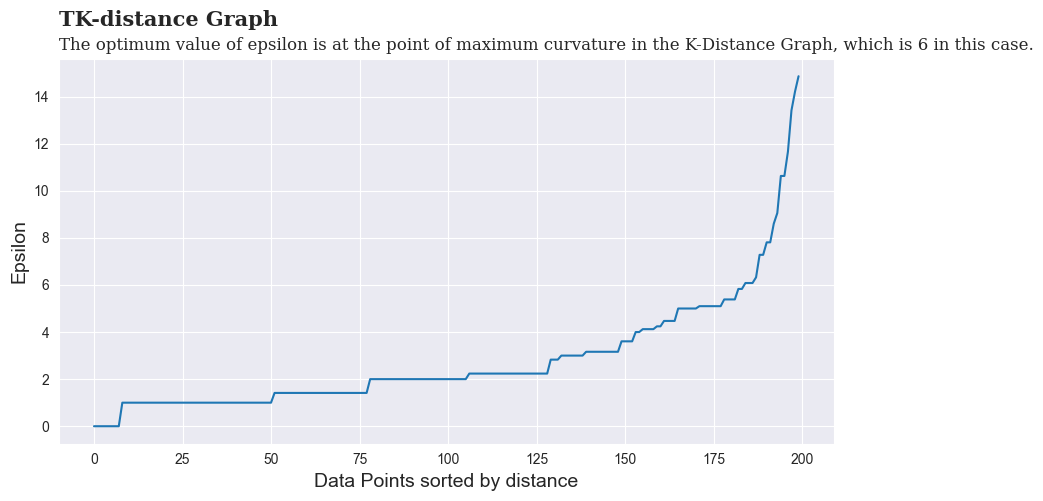

In [41]:
'''Plotting K-distance Graph'''
dist = np.sort(dist, axis=0)
dist = dist[:,1]

plt.figure(figsize=(10,5))
plt.text(-10, 17, 'TK-distance Graph', fontfamily='serif', fontsize=15, fontweight='bold')
plt.text(-10, 16, 'The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 6 in this case.',
        fontfamily='serif', fontsize=12)
plt.plot(dist)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

In [42]:
''' DBSCAN '''
model_dbscan = DBSCAN(eps=6, min_samples=3)
pred = model_dbscan.fit_predict(df_new)

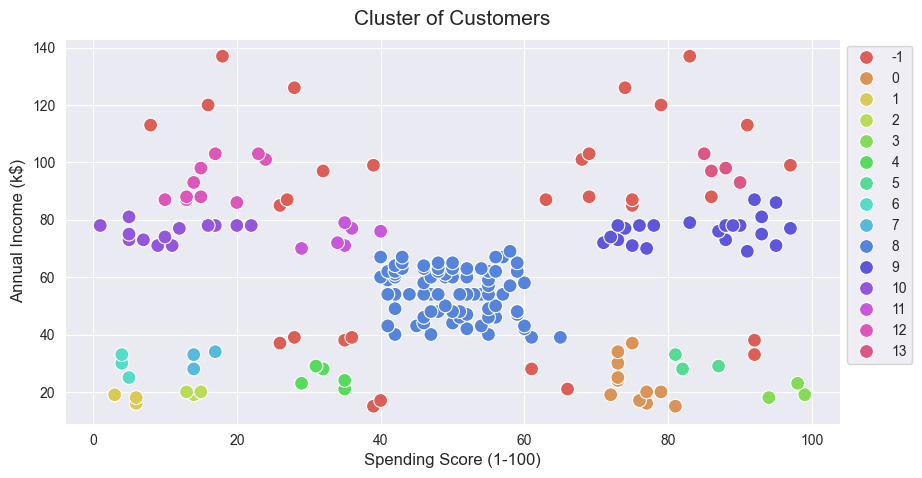

In [43]:
'''Visualizing all the clusters '''
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_new.iloc[:, 0], y=df_new.iloc[:, 1], hue=pred, palette=sns.color_palette('hls', 
                                                                                              len(np.unique(pred))), s=100)
plt.title('Cluster of Customers'.format(df_new.columns[0], df_new.columns[1]), size=15, pad=10)
plt.xlabel(df_new.columns[0], size=12)
plt.ylabel(df_new.columns[1], size=12)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

In [44]:
''' again using only two columns '''
df_new = df[['Spending Score (1-100)', 'Annual Income (k$)']]

df_new.head()

,Spending Score (1-100),Annual Income (k$)
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


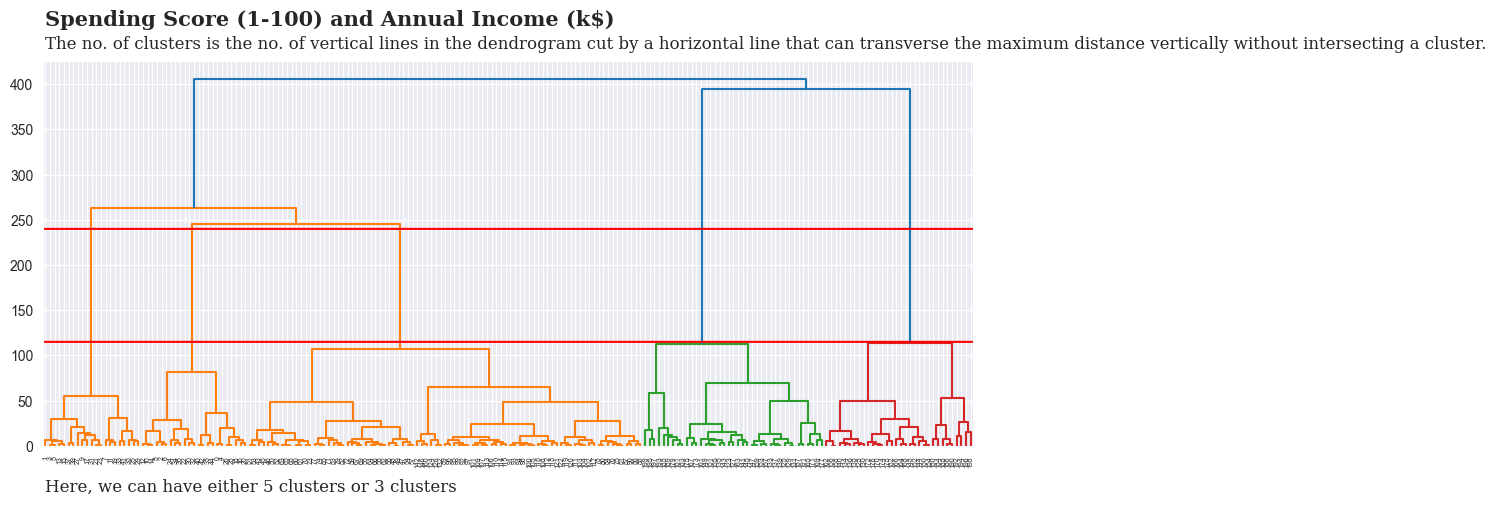

In [45]:
plt.figure(figsize = (12, 5))
plt.text(5, 465, 'Spending Score (1-100) and Annual Income (k$)', fontfamily='serif', fontsize=15, fontweight='bold')
plt.text(5, 440, 'The no. of clusters is the no. of vertical lines in the dendrogram cut by a horizontal line that can transverse the maximum distance vertically without intersecting a cluster.',
         fontfamily='serif',fontsize=12)
dendo = dendrogram(linkage(df_new, method = 'ward'))
plt.plot([115]*2000, color='r')
plt.plot([240]*2000, color='r')
plt.text(5, -50, 'Here, we can have either 5 clusters or 3 clusters',
         fontfamily='serif',fontsize=12)
plt.show()

In [46]:
''' Hierarchical Model '''
model = AgglomerativeClustering(n_clusters = 5, affinity='euclidean', linkage='ward')
pred = model.fit_predict(df_new)

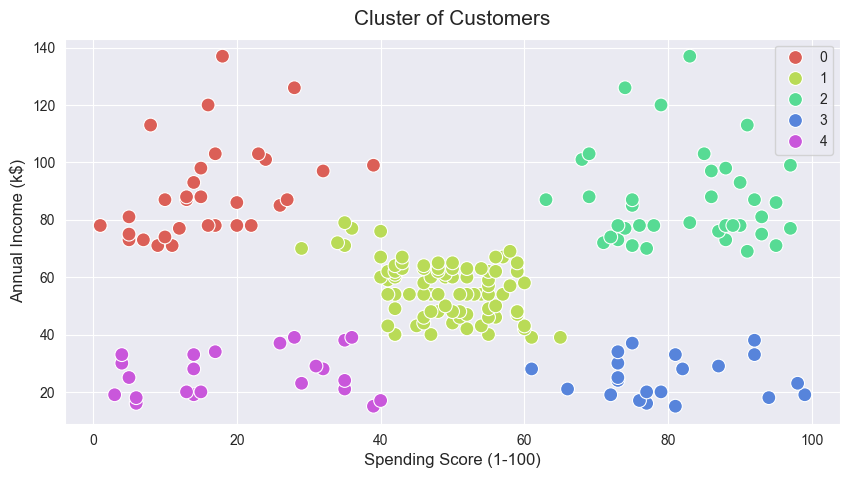

In [47]:
# Visualizing all the clusters 
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_new.iloc[:, 0], y=df_new.iloc[:, 1], hue=pred, palette=sns.color_palette('hls', 5), s=100)
plt.title('Cluster of Customers'.format(df_new.iloc[:, 0], df_new.iloc[:, 1]), size=15, pad=10)
plt.xlabel(df_new.columns[0], size=12)
plt.ylabel(df_new.columns[1], size=12)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()